# SPRINT 4 - Tarea M4 T01

*Utilizando las bibliotecas de visualización de datos Matplotlib o Seaborn, realiza los siguientes ejercicios.*

## Ejercicio 1
Descarga el dataset adjunto precio alquiler por trimestre y barri.csv extraído de la web OpenDataBCN y resume estadísticamente y gráficamente.

Crea al menos una visualización para:

 - Una variable categórica (Distrito o Barrio)  
 - Una variable numérica (Precio)  
 - Una variable numérica y una categórica (Distrito y Precio)  
 - Dos variables numéricas (Año o Trimestre y Precio)  
 - Tres variables (Barrio o Distrito, Trimestre y Precio)

### - Importar librerias + abrir y revisar archivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
BasePath = "C:/Users/Pepo/Desktop/Data Science/Barcelona Activa"
Archivo = BasePath + "/Sprint 4. Visualización gráfica de datos/preu lloguer per trimestre i barri.csv"
df = pd.read_csv(Archivo)

In [3]:
pd.options.display.max_columns = 0
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


### - Se identifica que la columna "Preu" el Dtype= object y se procede a cambiar a float.  

In [5]:
# Corregir el Dtype de la "Preu" (de object a float)

df['Preu'] = pd.to_numeric(df['Preu'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


### - Además, se corrige la columna ya que en la misma se manejan precios mensuales totales y precios mensuales por superficie.

In [6]:
#Corregir el dataframe, columna "Lloguer_mitja" maneja 2 criterios diferentes:

#Dividir/ crear 2 tablas y después unir

groups = df.groupby(df.Lloguer_mitja)

# (1) Alquiler medio mensual:
llmm_df = groups.get_group("Lloguer mitjà mensual (Euros/mes)")
llmm_df = llmm_df.drop(['Lloguer_mitja'], axis=1) #Elimino columna
llmm_df = llmm_df.rename(columns={'Preu':'Lloguer mitjà mensual (Euros/mes)'}) #Cambiar nombre

# (2) Alquiler medio por superficie:
llmps_df=groups.get_group("Lloguer mitjà per superfície (Euros/m2 mes)")
llmps_df = llmps_df.drop(['Lloguer_mitja'], axis=1) #Elimino columna
llmps_df = llmps_df.rename(columns={'Preu':'Lloguer mitjà per superfície (Euros/m2 mes)'}) #Cambiar nombre


# (3) Nueva tabla con otra columna:
df1 = pd.merge(llmm_df, llmps_df)

In [7]:
df1.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes)
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9


### - Del paso previo se identifica que existen valores NaN en la columna "Preu", se procede a verificar.

In [8]:
nan_rows = df1[df1.isnull().any(1)]
nan_rows.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes)
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,NaN,NaN
41,2021,1,7,Horta-Guinardó,42,la Clota,NaN,NaN
46,2021,1,8,Nou Barris,47,Can Peguera,NaN,NaN
53,2021,1,8,Nou Barris,54,Torre Baró,NaN,NaN
55,2021,1,8,Nou Barris,56,Vallbona,NaN,NaN


### - Barrios sin información del precio de alquiler en los cuatro trimestres/2021: 5    
### - Barrios sin información del precio de alquiler en un trimestre/2021: 1

In [9]:
# Barrios sin información de precio de alquiles total y por superficie:

nan_rows.groupby(['Codi_Districte', "Nom_Districte",'Codi_Barri', "Nom_Barri"]).agg(
            Trimestres_Preu_per_superficie = ("Nom_Barri",'count'),
            Trismestres_Preu_lloguer = ("Nom_Barri",'count'))

Trimestres_Preu_per_superficie  Trismestres_Preu_lloguer
Codi_Districte Nom_Districte  Codi_Barri Nom_Barri                                                                           
3              Sants-Montjuïc 12         la Marina del Prat Vermell                               4                         4
7              Horta-Guinardó 42         la Clota                                                 4                         4
8              Nou Barris     47         Can Peguera                                              4                         4
                              54         Torre Baró                                               4                         4
                              56         Vallbona                                                 4                         4
9              Sant Andreu    58         Baró de Viver                                            2                         2

### - Se eliminan filas con datos faltantes (no se consideran necesarios una vez identificados los barrios)

In [10]:
# df2 = nuevo data frame sin NaN rows
df2 = df1.dropna(how='any')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 291
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Any                                          270 non-null    int64  
 1   Trimestre                                    270 non-null    int64  
 2   Codi_Districte                               270 non-null    int64  
 3   Nom_Districte                                270 non-null    object 
 4   Codi_Barri                                   270 non-null    int64  
 5   Nom_Barri                                    270 non-null    object 
 6   Lloguer mitjà mensual (Euros/mes)            270 non-null    float64
 7   Lloguer mitjà per superfície (Euros/m2 mes)  270 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 19.0+ KB


### - Una variable categórica (Distrito o Barrio)

In [11]:
# Distrito con más barrios: (se usa el primer dataframe : df1, ya que los valores NaN no afectan a este análisis)

db_df = df1.groupby(['Codi_Districte', "Nom_Districte"]).agg(Total_Barrios = ("Codi_Barri",'count'))
db_df = db_df.sort_values(by=[('Total_Barrios')], ascending=False)
db_df

,,Total_Barrios
Codi_Districte,Nom_Districte,
8,Nou Barris,52
7,Horta-Guinardó,44
10,Sant Martí,40
3,Sants-Montjuïc,32
9,Sant Andreu,28
2,Eixample,24
5,Sarrià-Sant Gervasi,24
6,Gràcia,20
1,Ciutat Vella,16


**Se contabiliza la cantidad de barrios por cada distrito, obteniendo a Nou Barris como el distrito con más barrios: 52 en total**

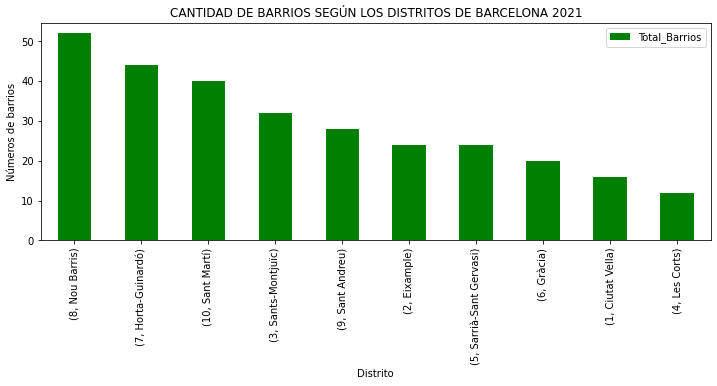

In [12]:
fig1 = db_df.plot(kind='bar', 
            rot=90,
            color= ("g"), # change color 
            figsize=(12,4), # Figsize to make the plot larger
            title='CANTIDAD DE BARRIOS SEGÚN LOS DISTRITOS DE BARCELONA 2021', # Adding a title to the top
            xlabel="Distrito", # Adding a label on the xaxis
            ylabel="Números de barrios", # Adding a label on y axis
            fontsize='medium'); # Making my ticks a bit bigger

### - Una variable numérica (Precio)

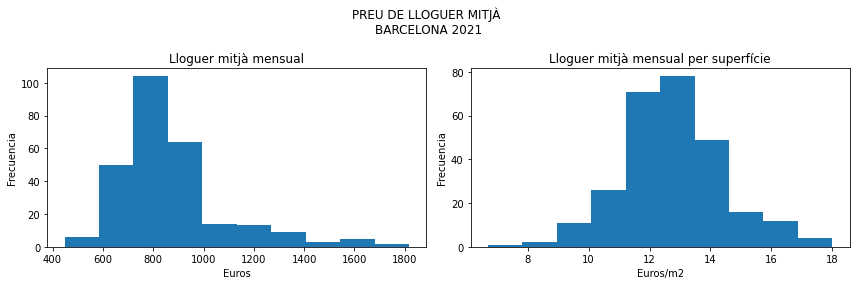

In [13]:
fig2 = plt.figure(figsize=(12, 4))

plt.subplot (1,2,1)
plt.hist(df2 ["Lloguer mitjà mensual (Euros/mes)"])
plt.title("Lloguer mitjà mensual")
plt.xlabel("Euros")
plt.ylabel("Frecuencia")
         
plt.subplot (1,2,2)
plt.hist(df2 ["Lloguer mitjà per superfície (Euros/m2 mes)"])
plt.title("Lloguer mitjà mensual per superfície")
plt.xlabel("Euros/m2")
plt.ylabel("Frecuencia")

plt.suptitle(("PREU DE LLOGUER MITJÀ \nBARCELONA 2021"))
plt.tight_layout() # para que no se superpongan las graficas


**El precio promedio de alquiler mensual con mayor frecuencia está entre los 700-900 Euros/mes, mientras que el precio promedio mensual por superficie está entre 11.5-13.5 Euros/m2**

### - Una variable numérica y una categórica (Distrito y Precio)

In [14]:
# Distrito más caro por superficie:

dyp_df = df2.groupby(['Codi_Districte', "Nom_Districte"]).agg(
            Preu_per_superficie = ("Lloguer mitjà per superfície (Euros/m2 mes)",'mean'))
dyp_df = dyp_df.sort_values(by=[('Preu_per_superficie')], ascending=False)
dyp_df

,,Preu_per_superficie
Codi_Districte,Nom_Districte,
5,Sarrià-Sant Gervasi,15.012500
4,Les Corts,14.008333
1,Ciutat Vella,13.775000
10,Sant Martí,13.440000
6,Gràcia,13.380000
2,Eixample,13.300000
3,Sants-Montjuïc,12.678571
7,Horta-Guinardó,11.987500
9,Sant Andreu,11.153846


**El distrito más costoso por m2 es el de Sarrià-Sant Gervasi con un valor promedio mensual de 15.01 Euros/m2, por otro lado el más económico es Nou Barris con un valor promedio mensual de 10.92 Euros/m2**

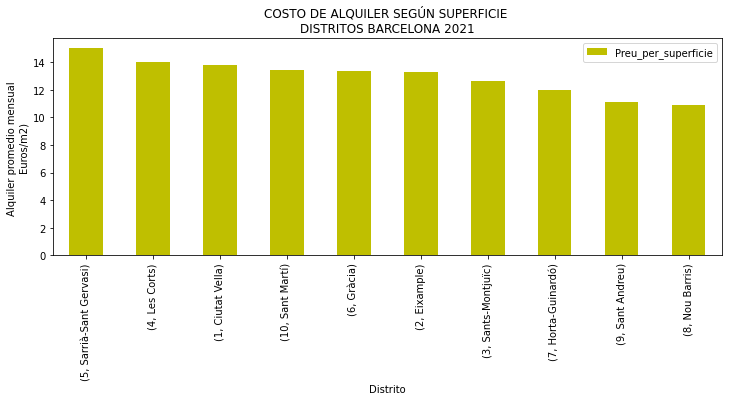

In [15]:
fig3 = dyp_df.plot(kind='bar', 
            rot=90,
            color= ("y"), # change color 
            figsize=(12,4), # Figsize to make the plot larger
            title='COSTO DE ALQUILER SEGÚN SUPERFICIE \nDISTRITOS BARCELONA 2021', # Adding a title to the top
            xlabel="Distrito", # Adding a label on the xaxis
            ylabel="Alquiler promedio mensual \nEuros/m2)", # Adding a label on y axis
            fontsize='medium'); # Making my ticks a bit bigger

### - Dos variables numéricas (Año o Trimestre y Precio)

In [16]:
# Precio promedio trimestral de alquiler mensual:

typ_df = df2.groupby(['Trimestre'])[['Lloguer mitjà mensual (Euros/mes)']].agg('mean')
typ_df

,Lloguer mitjà mensual (Euros/mes)
Trimestre,
1,869.304478
2,851.910294
3,880.794030
4,884.467647


**Se observa un incremento del precio promedio de alquiler mensual en el último trimestre (4), en comparación a los anteriores.**  
**Además podemos concluir que la segunta mitad del año tiene un costo mayor que la primera mitad.**

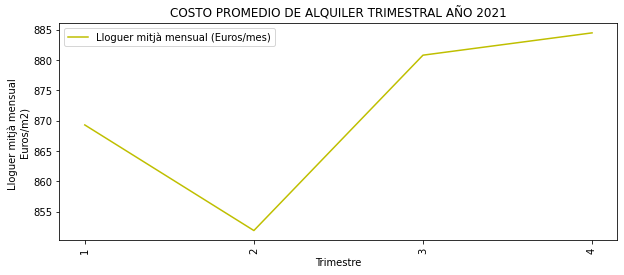

In [17]:
fig4 = typ_df.plot(
            rot=90,
            color= ("y"), # change color
            xticks = range(1, 5),
            figsize=(10,4), # Figsize to make the plot larger
            title='COSTO PROMEDIO DE ALQUILER TRIMESTRAL AÑO 2021', # Adding a title to the top
            xlabel="Trimestre", # Adding a label on the xaxis
            ylabel="Lloguer mitjà mensual \nEuros/m2)", # Adding a label on y axis
            fontsize='medium'); # Making my ticks a bit bigger


### - Tres variables (Barrio o Distrito, Trimestre y Precio)

In [18]:
# Precio promedio trimestral de alquiler según distrito:

table2 = pd.pivot_table(df2, index=['Nom_Districte'], 
                    columns=['Trimestre'], 
                    values='Lloguer mitjà mensual (Euros/mes)', aggfunc=np.mean)
table2

Trimestre,1,2,3,4
Nom_Districte,,,,
Ciutat Vella,844.275000,846.300000,863.500000,881.625000
Eixample,980.783333,990.500000,1004.466667,1026.433333
Gràcia,867.880000,868.320000,888.480000,884.380000
Horta-Guinardó,754.630000,761.350000,776.100000,767.950000
Les Corts,1171.933333,1194.633333,1272.133333,1217.566667
Nou Barris,665.720000,652.200000,668.810000,670.440000
Sant Andreu,731.150000,699.271429,725.333333,731.042857
Sant Martí,901.770000,871.590000,941.060000,951.380000
Sants-Montjuïc,799.271429,791.228571,803.414286,801.814286


**-Ciutat Vella y Eixample: incremento gradual del alquiler durante el año**  
**-Les Corts y Sarrià-Sant Gervasi: Distritos con precio de alquiler más elevado, sin embargo Sarrià-Sant Gervasi es el único districo en tener una disminución del precio en el 4to. trimestre comparado al 1er trimestre.**  
**-Nou Barris y Sant Andreu: Distritos con menor fluctuación en el precio de alquiler**

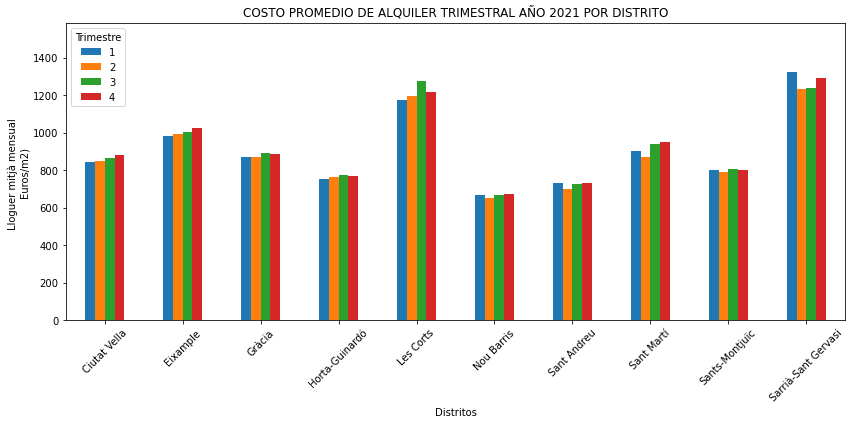

In [19]:
fig5 = table2.plot(kind='bar', 
            rot=45,                  
            figsize=(12,6), # Figsize to make the plot larger
            title='COSTO PROMEDIO DE ALQUILER TRIMESTRAL AÑO 2021 POR DISTRITO', # Adding a title to the top
            xlabel="Distritos", # Adding a label on the xaxis
            ylabel="Lloguer mitjà mensual \nEuros/m2)", # Adding a label on y axis
            fontsize='medium'); # Making my ticks a bit bigger
plt.tight_layout()

# codigo para: annotate
#ax.bar_label(ax.containers[0], label_type='edge', color='m', rotation=0, fontsize=10, padding=3)

# pad the spacing between the number and the edge of the figure
fig5.margins(y=0.2)

## Ejercicio 2

Exporta los gráficos como imágenes o HTML.

In [20]:
#Se guardan los gráficos en carpeta específica:

BasePath = "C:/Users/Pepo/Desktop/Data Science/Barcelona Activa"
Carpeta = BasePath + "/Sprint 4. Visualización gráfica de datos/Graficas preu lloguer"

#Gráfico No.1: CANTIDAD DE BARRIOS SEGÚN LOS DISTRITOS DE BARCELONA 2021
fig1.figure.savefig(Carpeta + '/Cantidad de Barrios.jpeg', bbox_inches='tight')

#Gráfico No.2: PREU DE LLOGUER MITJÀ:
fig2.figure.savefig(Carpeta + '/Precio de alquiler.jpeg', bbox_inches='tight')

#Gráfico No.3: COSTO DE ALQUILER SEGÚN SUPERFICIE
fig3.figure.savefig(Carpeta + '/Costo de alquiler por superficie.jpeg', bbox_inches='tight')

#Gráfico No.4: COSTO PROMEDIO DE ALQUILER TRIMESTRAL AÑO 2021:
fig4.figure.savefig(Carpeta + '/Costo promedio de alquiler.jpeg', bbox_inches='tight')

#Gráfico No.5: COSTO PROMEDIO DE ALQUILER TRIMESTRAL AÑO 2021 POR DISTRITO:
fig5.figure.savefig(Carpeta + '/Costo Trimestral Promedio.jpeg', bbox_inches='tight')

## Ejercicio 3
Propone alguna visualización que creas que puede resultar interesante.

In [21]:
# Precio promedio trimestral de alquiler según distrito:

table3 = pd.pivot_table(df2, index=['Nom_Barri'], 
                    columns=['Trimestre'], 
                    values='Lloguer mitjà mensual (Euros/mes)', aggfunc=np.mean)
table3

Trimestre,1,2,3,4
Nom_Barri,,,,
Baró de Viver,NaN,447.5,NaN,616.7
Can Baró,741.1,773.5,753.7,757.7
Canyelles,762.5,673.8,769.9,763.3
Ciutat Meridiana,520.2,488.1,547.7,546.8
Diagonal Mar i el Front Marítim del Poblenou,978.4,948.3,1162.9,1205.3
...,...,...,...,...
la Vila Olímpica del Poblenou,1298.9,1248.6,1343.1,1364.7
la Vila de Gràcia,910.6,881.0,891.6,920.9
les Corts,990.3,998.8,1017.0,1052.8


In [22]:
#Mayor tamaño de viviendas por barrio:
df2['Tamaño_Vivienda'] = round((df2['Lloguer mitjà mensual (Euros/mes)'] / df2['Lloguer mitjà per superfície (Euros/m2 mes)']),2)

C:\Users\Pepo\AppData\Local\Temp/ipykernel_10736/3175539753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tamaño_Vivienda'] = round((df2['Lloguer mitjà mensual (Euros/mes)'] / df2['Lloguer mitjà per superfície (Euros/m2 mes)']),2)


In [23]:
df2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes),Tamaño_Vivienda
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8,59.31
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3,75.58
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5,52.19
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3,66.12
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9,71.16
...,...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2,79.30
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8,64.86
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8,70.86
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7,70.62


**Ya que tenemos el precio de alquiler total y el precio por superficie, podemos determinar el tamaño de las viviendas, y así poder conocer que barrios cuentas con las viviendas más grandes/pequeñas**

In [24]:
# Tamaño de viviendas:

tv_df = df2.groupby(['Nom_Barri'])[['Tamaño_Vivienda']].agg('mean')
tv_df

,Tamaño_Vivienda
Nom_Barri,
Baró de Viver,66.9100
Can Baró,60.4125
Canyelles,79.6275
Ciutat Meridiana,59.0950
Diagonal Mar i el Front Marítim del Poblenou,68.2300
...,...
la Vila Olímpica del Poblenou,78.7300
la Vila de Gràcia,63.6750
les Corts,72.3500


In [28]:
tv_df.describe()

,Tamaño_Vivienda
count,68.000000
mean,67.999081
std,10.487951
min,50.990000
25%,62.488750
50%,66.187500
75%,70.506875
max,112.752500


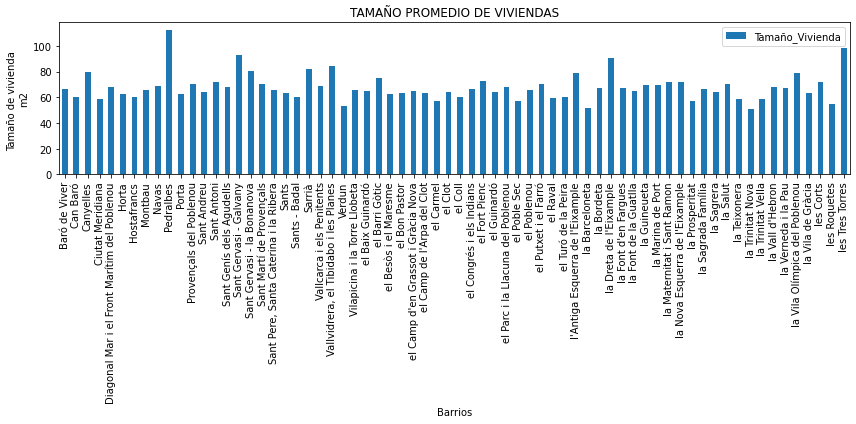

In [25]:
fig6 = tv_df.plot(kind='bar', 
            rot=90,                                    
            figsize=(12,6), # Figsize to make the plot larger
            title='TAMAÑO PROMEDIO DE VIVIENDAS', # Adding a title to the top
            xlabel="Barrios", # Adding a label on the xaxis
            ylabel="Tamaño de vivienda \nm2", # Adding a label on y axis
            fontsize='medium'); # Making my ticks a bit bigger
plt.tight_layout()

# pad the spacing between the number and the edge of the figure
fig5.margins(y=0.3)

**- El tamaño promedio de vivienda está alrededor de 68 m2.**

In [26]:
#Gráfico No.6: 
fig6.figure.savefig(Carpeta + '/Tamano Vivienda.jpeg', bbox_inches='tight')